# Tp OPtimisation  

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# Definition de la fonction principale 

def f(p):
    return 1/2*math.pow(p[0] , 2) + 7/2* math.pow(p[1],2) 

In [4]:
# gradiant de f

def grad_f(p):
    return np.array([p[0] ,7*p[1]])

In [5]:
def norme(v):
    return math.sqrt(pow(v[0] , 2) + math.pow(v[1],2))


In [6]:
def produit_scalaire(vect1 , vect2):
    s = 0
    if(len(vect1) != len(vect2)):
        return "imposible"
    else:
        for i in range(len(vect1)):
            s = s + vect1[i]*vect2[i]
        return s

In [7]:
# pour calculer la norme d'un vecteur
def normeg(vect):
    s = 0
    for i in range(len(vect)):
        s = s+ math.pow(vect[i] , 2)
    return math.sqrt(s)

## Algorthime de Descente 1

In [8]:
# second critere d'optimalité Stagnation de la solution courante

def stagnation_valeur_courante(xk_1 , xk):
    return norme(xk_1 - xk)

## Descente à pas fixe respectant le critère d'optimalité

In [16]:
# x0 point de ou commence l'algorithme
# s represente le pas
# e represente la precision
def descente_a_pas_fixe( e , x0, s):
    k=0
    xk = x0
    data =[]
    try:
        while( norme(grad_f(xk)) >  e):
            dk = -grad_f(xk)
            xk = xk + s* dk
            k = k+1
            data.append([k , xk])
    except:
        return "Dv"
        
    return data


In [17]:
descente_a_pas_fixe(10e-5 , [7,1.5] , 0.125)

[[1, array([6.125 , 0.1875])],
 [2, array([5.359375 , 0.0234375])],
 [3, array([4.68945312e+00, 2.92968750e-03])],
 [4, array([4.10327148e+00, 3.66210938e-04])],
 [5, array([3.59036255e+00, 4.57763672e-05])],
 [6, array([3.14156723e+00, 5.72204590e-06])],
 [7, array([2.74887133e+00, 7.15255737e-07])],
 [8, array([2.40526241e+00, 8.94069672e-08])],
 [9, array([2.10460461e+00, 1.11758709e-08])],
 [10, array([1.84152903e+00, 1.39698386e-09])],
 [11, array([1.61133790e+00, 1.74622983e-10])],
 [12, array([1.40992067e+00, 2.18278728e-11])],
 [13, array([1.23368058e+00, 2.72848411e-12])],
 [14, array([1.07947051e+00, 3.41060513e-13])],
 [15, array([9.44536696e-01, 4.26325641e-14])],
 [16, array([8.26469609e-01, 5.32907052e-15])],
 [17, array([7.23160908e-01, 6.66133815e-16])],
 [18, array([6.32765795e-01, 8.32667268e-17])],
 [19, array([5.53670070e-01, 1.04083409e-17])],
 [20, array([4.84461311e-01, 1.30104261e-18])],
 [21, array([4.23903647e-01, 1.62630326e-19])],
 [22, array([3.70915692e-01

### Tableau de test pas le pas fixe  
### pasTest = [0.25,0.125 , 0.05 , 0.01]


In [14]:
pasTest = [0.25,0.125 , 0.05 , 0.01]

In [15]:
resultat= []
for i in range(len(pasTest)):
    resultat.append(descente_a_pas_fixe(10e-5 , np.array([7,1.5] ),pasTest[i]))
    

TypeError: descente_a_pas_fixe() missing 1 required positional argument: 's'

In [52]:
def dataplot(datap):
    x=[]
    y=[]
    fig ,ax = plt.subplots()
    ax.set_prop_cycle(color=['red','green','blue','yellow'])
    for j in range(len(datap)):
        for i in range(len(datap[j]) ):
            x.append(datap[j][i][1][0])
            y.append(datap[j][i][1][1])
        plt.rcParams["figure.figsize"] = (20,20)
        ax.set_title('Itérations de l ago de gradient à pas fixe  générées à partir du point [7,1.5]',
        fontsize = 14)
        plt.plot(x,y ,label = "itermanfbjkfbgfkjbg")
    plt.show()

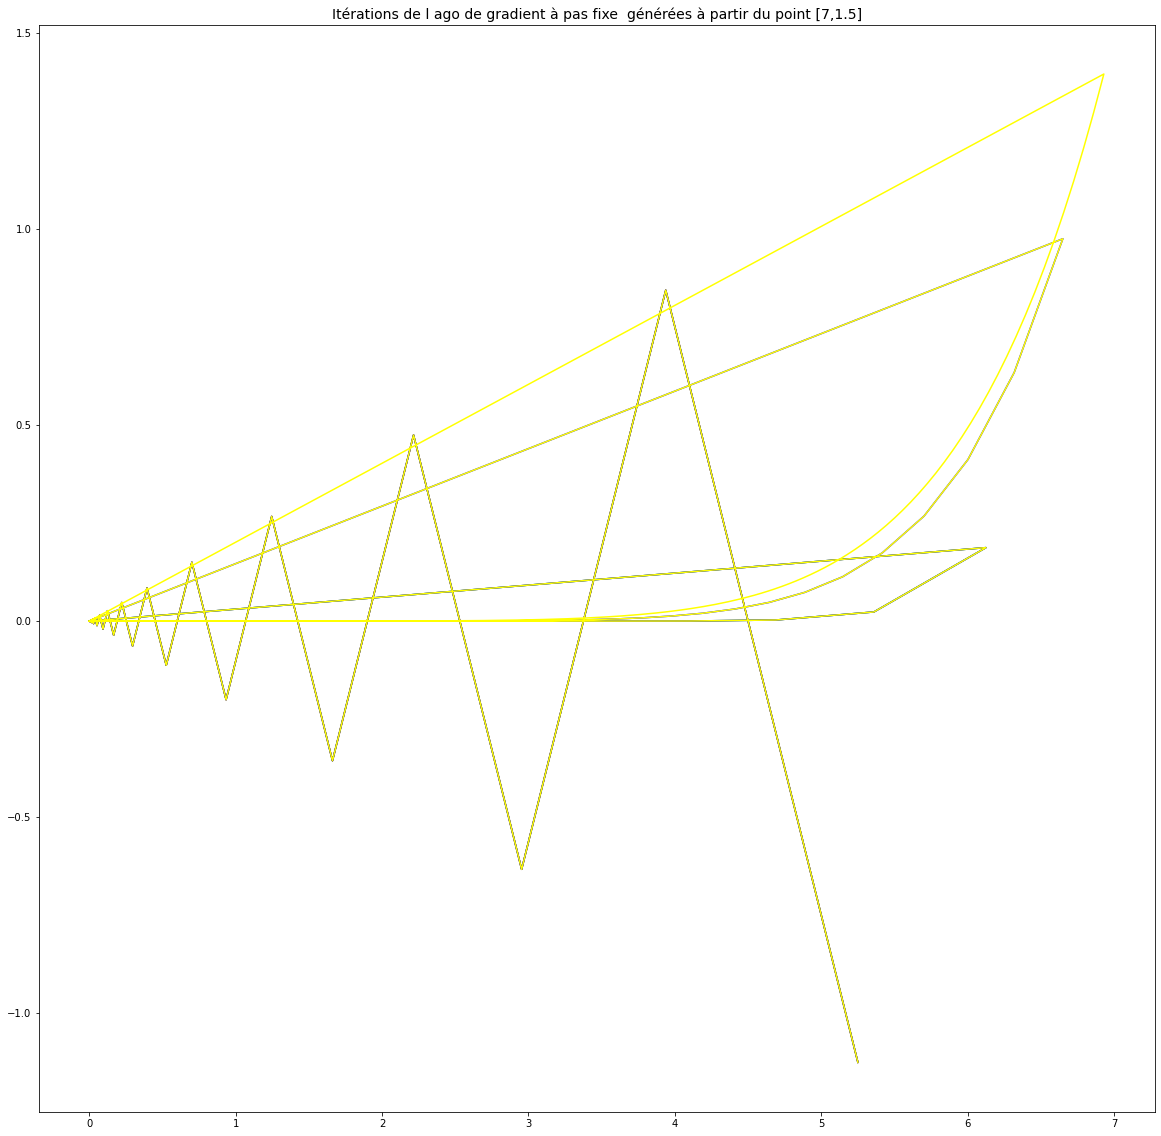

In [53]:
dataplot(resultat)

In [ ]:
# 

In [54]:
datap= descente_a_pas_fixe(10e-5 , np.array([7,1.5] ),0.01)
x=[]
y=[]
for i in range(len(datap) ):
    x.append(datap[i][1][0])
    y.append(datap[i][1][1])

#datap[1][1][0]
plt.rcParams["figure.figsize"] = (20,20)

#plt.plot(x,y , color ="blue")
#plt.show()
print("ok")

ok


## Descente à pas Optimal respectant le critère d'optimalité

In [55]:
#pas Optimal solution du probleme Minf(xk+s*dk) avec s positif

def s(x):
    return (pow(x[0],2) + pow(7,2)*pow(x[1] , 2)) /(pow(x[0],2) + pow(7,3)*pow(x[1] , 2))

In [ ]:
# e : precision 
#x0 : point de départ

def descentePasOptimal(e , x0):
    xk = x0
    k=0
    data = []
    #norme(grad_f(x0))<=e
    while(norme(grad_f(xk)) > e):
        dk = -grad_f(xk)
        xk = xk + s(xk)*dk
        k = k+1
        data.append([k,xk])
    return data

In [ ]:

descentePasOptimal(10e-10 ,[7,1.5])

# Algroiithme 2 Amidjo et wolfe

#### f(x+s*d)  <= f(x) +ep1*d(grad(f(x))T*d)
#### soit fi(s) <= fi(0) + ep1*d*fi'(O)

In [56]:
f(np.array([7,1.5]) + 0.5* np.array([-7, -10.5]) )


55.34375

In [59]:
f(np.array([7,1.5]) )+0.125*10e-4* produit_scalaire(grad_f(np.array([7,1.5])) , np.array([-7, -10.5])) 

32.35509375

In [60]:
def premiere_condition_de_wolfe(x ,s, dk , ep1 ):
    if f(x +s*dk )  <= f(x) + ep1*s* produit_scalaire(grad_f(x) ,dk) :
        return True
    else:
        return False

In [61]:
premiere_condition_de_wolfe(np.array([8,0]) , 1 ,np.array([1,0]),0.0)

False

In [66]:
def deuxieme_condition_de_wolfe(x,s,dk , ep2):
    if produit_scalaire( grad_f(x + s*dk) , dk)    < ep2 * produit_scalaire(grad_f(x), dk):
        return False
    else:
        True

In [ ]:
deuxieme_condition_de_wolfe(np.array([8,19]) , 0.1 ,np.array([1,1]),0.8)

In [ ]:
produit_Scalaire(np.array([1,2]) , np.array([2,3,3]))

In [63]:
 norme([2,1,4])

2.23606797749979

In [64]:
def recherche_lineaire_de_wolfe(x,ep1 ,ep2 ,s, d ):
    s_=0
    s_plus = float('inf')
    sk = s
    infini = float('inf')
    k = 0
    condition_wolfe = False
    while condition_wolfe == False:
        if premiere_condition_de_wolfe(x ,sk, d , ep1 ) == False :#pas trop grad
            s_plus = sk
            sk = (s_plus + s_ )/2
            condition_wolfe = False
        elif deuxieme_condition_de_wolfe(x,sk,d , ep2)  == False :# pas trop petit
            s_ = sk
            if s_plus < infini :
                sk = (s_plus + s_ )/2
            else:
                sk = 2*sk
        else :
            condition_wolfe = True
        k = k+1
    return sk


In [67]:
recherche_lineaire_de_wolfe(np.array([7,1.5] ), 10e-4 , 0.99 ,8 , np.array([-7,-10.5]))

0.25

In [76]:
def descente_gradiant_wolfe(e , x0 , ep1 = 10e-4 , ep2  = 0.99 ,s = 1000000) :
    xk = x0
    k=0
    data=[]
    #norme(grad_f(x0))<=e
    while(norme(grad_f(xk)) > e):
        dk = -(grad_f(xk))
        sk = recherche_lineaire_de_wolfe(xk,ep1 ,ep2 ,s, dk )
        xk = xk + sk* dk
        k = k+1
        print(k)
        data.append([k,xk])
    return xk

In [78]:
descente_gradiant_wolfe(10e-5 , np.array([7, 1.5]) )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


array([ 5.53091490e-05, -9.91407779e-06])